In [ ]:
# 1. Follow the instruction below and then report how the performance changed.(apply all at once)
# • Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
# • Dropout layer at 20%.
# • Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
# • Max Pool layer with size 2×2.
# • Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
# • Dropout layer at 20%.
# • Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
# • Max Pool layer with size 2×2.
# • Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
# • Dropout layer at 20%.
# • Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
# • Max Pool layer with size 2×2.
# • Flatten layer.
# • Dropout layer at 20%.
# • Fully connected layer with 1024 units and a rectifier activation function.
# • Dropout layer at 20%.
# • Fully connected layer with 512 units and a rectifier activation function.
# • Dropout layer at 20%.
# • Fully connected output layer with 10 units and a Softmax activation function

In [26]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
his=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_30 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               4194816   
                                                      

In [24]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
his=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/5
1563/1563 [==============================] - 29s 17ms/step - loss: 1.8949 - accuracy: 0.3185 - val_loss: 1.7296 - val_accuracy: 0.3702
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6030 - accuracy: 0.4275 - val_loss: 1.4828 - val_accuracy: 0.4801
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4394 - accuracy: 0.4843 - val_loss: 1.4161 - val_accuracy: 0.4788
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3191 - accuracy: 0.5269 - val_loss: 1.2563 - val_accuracy: 0.5517
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2141 - accuracy: 0.5638 - val_loss: 1.1713 - val_accuracy: 0.5854
Accuracy: 58.54%


In [ ]:
# 2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
# images to check whether or not the model has predicted correctly.


In [10]:
import numpy as np
predictions = model.predict(X_test[:4])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:4], axis=1)

print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 154ms/step
Predicted labels: [3 1 1 0]
Actual labels:    [3 8 8 0]


In [ ]:
# 3. Visualize Loss and Accuracy using the history object

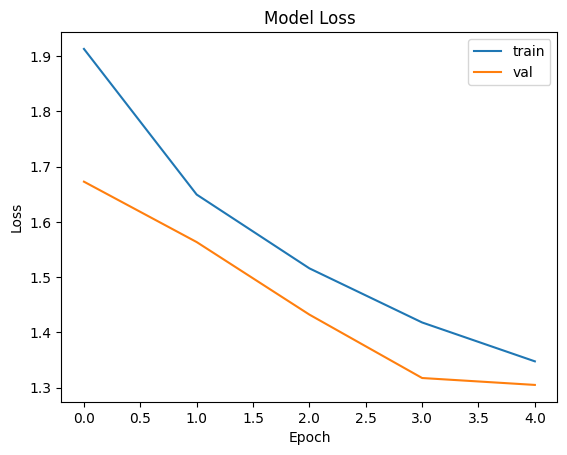

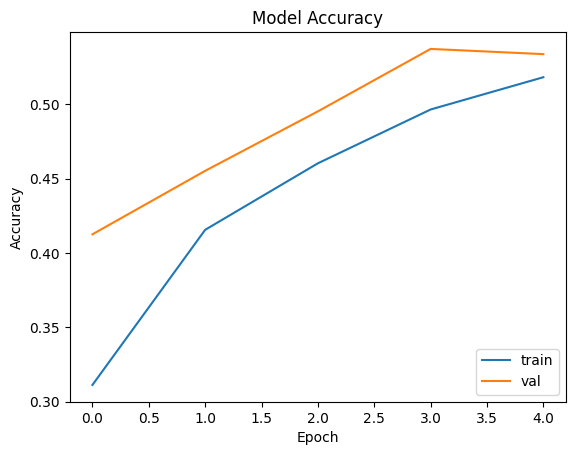

In [27]:
import matplotlib.pyplot as plt

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
